<a href="https://colab.research.google.com/github/podfleur/intro-ml/blob/main/CollecteDonnees/tp_collecte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import des librairies ##

In [2]:
#Imports librairies de base
import numpy as np
import pandas as pd

#Affichage de Graphes
from IPython.display import Markdown, display, HTML
import matplotlib.pyplot as plt

#Information Mutuelle
from sklearn.feature_selection import mutual_info_regression


## 1. Lecture des données ##

1.1 Charger les données d'apprentissage (Data/passagers.csv) dans un DataFrame nommé train. Afficher 10 exemples.

In [6]:
train = pd.read_csv('passagers.csv', dtype={'object': int})
train.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
593,594,0,3,"Bourke, Miss. Mary",female,NaN,0,2,364848,7.7500,NaN,Q
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
826,827,0,3,"Lam, Mr. Len",male,NaN,0,0,1601,56.4958,NaN,S
526,527,1,2,"Ridsdale, Miss. Lucy",female,50.0,0,0,W./C. 14258,10.5000,NaN,S
336,337,0,1,"Pears, Mr. Thomas Clinton",male,29.0,1,0,113776,66.6000,C2,S
403,404,0,3,"Hakkarainen, Mr. Pekka Pietari",male,28.0,1,0,STON/O2. 3101279,15.8500,NaN,S
537,538,1,1,"LeRoy, Miss. Bertha",female,30.0,0,0,PC 17761,106.4250,NaN,C
419,420,0,3,"Van Impe, Miss. Catharina",female,10.0,0,2,345773,24.1500,NaN,S
351,352,0,1,"Williams-Lambert, Mr. Fletcher Fellows",male,NaN,0,0,113510,35.0000,C128,S
661,662,0,3,"Badt, Mr. Mohamed",male,40.0,0,0,2623,7.2250,NaN,C


1.2 Charger les données d'apprentissage (Data/test.csv) dans un Dataframe nommé test. Afficher 10 exemples.

In [7]:
test = pd.read_csv('test.csv', dtype={'object': int})
test.sample(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
105,997,3,"Holthen, Mr. Johan Martin",male,28.0,0,0,C 4001,22.5250,NaN,S
27,919,3,"Daher, Mr. Shedid",male,22.5,0,0,2698,7.2250,NaN,C
53,945,1,"Fortune, Miss. Ethel Flora",female,28.0,3,2,19950,263.0000,C23 C25 C27,S
246,1138,2,"Karnes, Mrs. J Frank (Claire Bennett)",female,22.0,0,0,F.C.C. 13534,21.0000,NaN,S
343,1235,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C
149,1041,2,"Lahtinen, Rev. William",male,30.0,1,1,250651,26.0000,NaN,S
350,1242,1,"Greenfield, Mrs. Leo David (Blanche Strouse)",female,45.0,0,1,PC 17759,63.3583,D10 D12,C
310,1202,3,"Cacic, Mr. Jego Grga",male,18.0,0,0,315091,8.6625,NaN,S
179,1071,1,"Compton, Mrs. Alexander Taylor (Mary Eliza Ing...",female,64.0,0,2,PC 17756,83.1583,E45,C
221,1113,3,"Reynolds, Mr. Harold J",male,21.0,0,0,342684,8.0500,NaN,S


1.3 Afficher les informations des deux DataFrames train et Test.

In [10]:
print("Informations sur le DataFrame train : ")
train.info()

print("\nInformations sur le DataFrame test : ")
test.info()

Informations sur le DataFrame train : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Informations sur le DataFrame test : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       -

1.4 Calculer le taux global de survie

In [25]:
survival_rate = (train['Survived'].sum() / len(train)) * 100

print(f"Taux global de survie : {survival_rate:.2f}%")


Taux global de survie : 38.38%


### Question 1 : Quel Travail voyez-vous pour que les données soient prêtes à faire tourner dans un modèle ?

#### Avant d'entraîner un modèle, les données doivent être préparées et triées :

- Les données manquantes doivent être ou supprimées, ou renseignées.
- Les données incohérentes doivent être corrigées.
- Seules les valeurs numériques sont acceptées, il faudra donc convertir les données non-numériques.
- Les colonnes inutiles doivent être supprimées.
- Les données numériques doivent être ramenées à la même échelle.
- On peut créer des nouvelles variables afin de regrouper les données par catégories.

<br>

#### Dans les sets de données train et test :    
- Certaines valeurs sont manquantes - Age contient des valeurs manquantes dans les deux jeux (train et test). Cabin a de nombreuses valeurs manquantes (majorité absentes) → à ignorer ou à transformer. Embarked a 2 valeurs manquantes dans train. Fare a une valeur manquante dans test.
- Des variables telles que Sex et Embarked sont à encoder.
- En terme de feature ingeneering, il serait possible d'extraire les titres de civilité des noms et leur accorder leur propre colonne, séparer la colonne nom en nom/prénom, créer des catégories d'âge...

<br>
<br>

### Question 2 : Quelle différence y-a-t'il entre les données train et les données test ?

Les données test contiennent uniquement les features, sans la variable cible. Elles servent à tester le modèle et générer des prédictions finales. Tandis que les données train contiennent à la fois les features et et la variable cible (Survived). Elles servent à entraîner le modèle à prédire la survie.

<br>
<br>

### Question 3 : Quel est le rôle de ces deux sets de données ?

Le set de données test permet de mesurer la performance du modèle sur des données nouvelles et d'éviter l'overfitting, quant au set de données train : il entraîne le modèle pour apprendre les patterns et ajuster ses paramètres.


## 2. Analyse des features

2.1 Analyser l'effet de la variable Classe sur le taux de survie, en affichant le % de survie par classe

In [26]:
survival_per_class = train.groupby('Pclass')['Survived'].mean() * 100
survival_per_class = survival_per_class.round(2)

print(survival_per_class)

Pclass
1    62.96
2    47.28
3    24.24
Name: Survived, dtype: float64


2.2 Analyser l'effet de la variable Genre (Sex) sur le taux de survie, en affichant le % de survie par classe

In [27]:
survival_per_gender_class = train.groupby(['Pclass', 'Sex'])['Survived'].mean() * 100
survival_per_gender_class = survival_per_gender_class.round(2)

print(survival_per_gender_class)

Pclass  Sex   
1       female    96.81
        male      36.89
2       female    92.11
        male      15.74
3       female    50.00
        male      13.54
Name: Survived, dtype: float64


2.3 Calculer une nouvelle colonne FamilySize contenant la taille de la famille, pour les DataFrame train et Test. Afficher pour 10 exemples l'Id du passager, le nom, l'age, le sexe et la taille de la famille.

In [19]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

print(train[['PassengerId', 'Name', 'Age', 'Sex', 'FamilySize']].head(10))


   PassengerId                                               Name   Age  \
0            1                            Braund, Mr. Owen Harris  22.0   
1            2  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0   
2            3                             Heikkinen, Miss. Laina  26.0   
3            4       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0   
4            5                           Allen, Mr. William Henry  35.0   
5            6                                   Moran, Mr. James   NaN   
6            7                            McCarthy, Mr. Timothy J  54.0   
7            8                     Palsson, Master. Gosta Leonard   2.0   
8            9  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  27.0   
9           10                Nasser, Mrs. Nicholas (Adele Achem)  14.0   

      Sex  FamilySize  
0    male           2  
1  female           2  
2  female           1  
3  female           2  
4    male           1  
5    male           1  
6    m

2.4 Visualisez le nombre de personnes et le taux de survie par taille de famille.

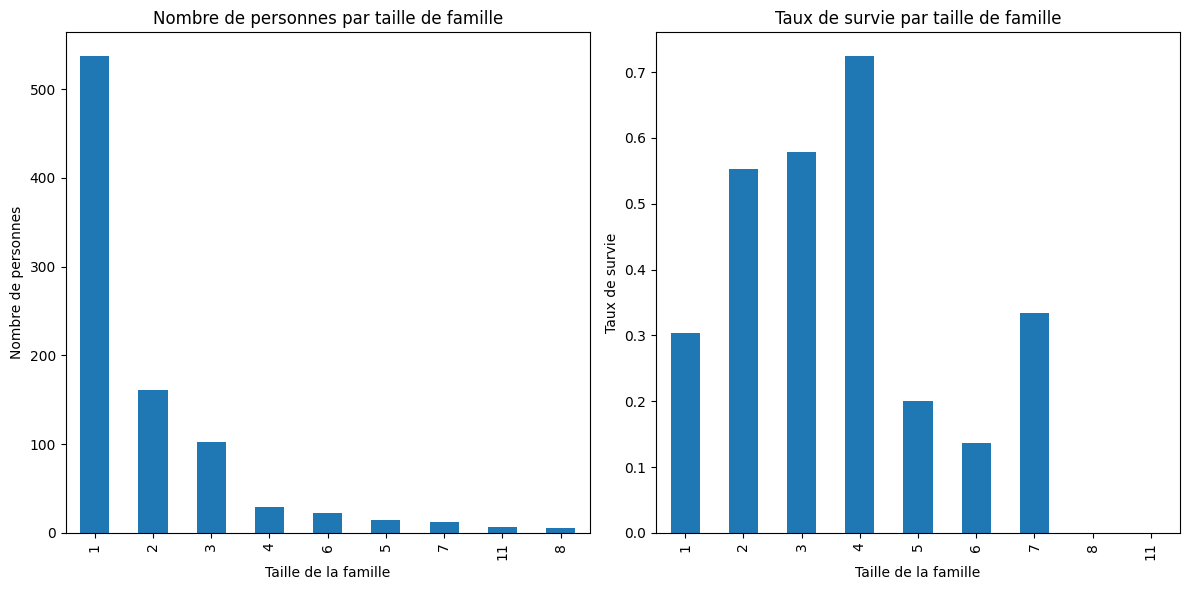

In [20]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
train['FamilySize'].value_counts().plot(kind='bar')
plt.title('Nombre de personnes par taille de famille')
plt.xlabel('Taille de la famille')
plt.ylabel('Nombre de personnes')

plt.subplot(1, 2, 2)
train.groupby('FamilySize')['Survived'].mean().plot(kind='bar')
plt.title('Taux de survie par taille de famille')
plt.xlabel('Taille de la famille')
plt.ylabel('Taux de survie')

plt.tight_layout()
plt.show()


2.5 Calculer une nouvelle colonne IsAlone indiquant si le passager est seul ou pas, pour les DataFrame train et Test. Afficher pour 10 exemples l'Id du passager, le nom, l'age, le sexe et le status IsAlone.

In [21]:
train['IsAlone'] = 0
train.loc[train['FamilySize'] == 1, 'IsAlone'] = 1

test['IsAlone'] = 0
test.loc[test['FamilySize'] == 1, 'IsAlone'] = 1

print(train[['PassengerId', 'Name', 'Age', 'Sex', 'IsAlone']].head(10))


   PassengerId                                               Name   Age  \
0            1                            Braund, Mr. Owen Harris  22.0   
1            2  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0   
2            3                             Heikkinen, Miss. Laina  26.0   
3            4       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0   
4            5                           Allen, Mr. William Henry  35.0   
5            6                                   Moran, Mr. James   NaN   
6            7                            McCarthy, Mr. Timothy J  54.0   
7            8                     Palsson, Master. Gosta Leonard   2.0   
8            9  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  27.0   
9           10                Nasser, Mrs. Nicholas (Adele Achem)  14.0   

      Sex  IsAlone  
0    male        0  
1  female        0  
2  female        1  
3  female        0  
4    male        1  
5    male        1  
6    male        1  
7    m

2.6 Visualisez le nombre de personnes et le taux de survie par statut seul ou pas.

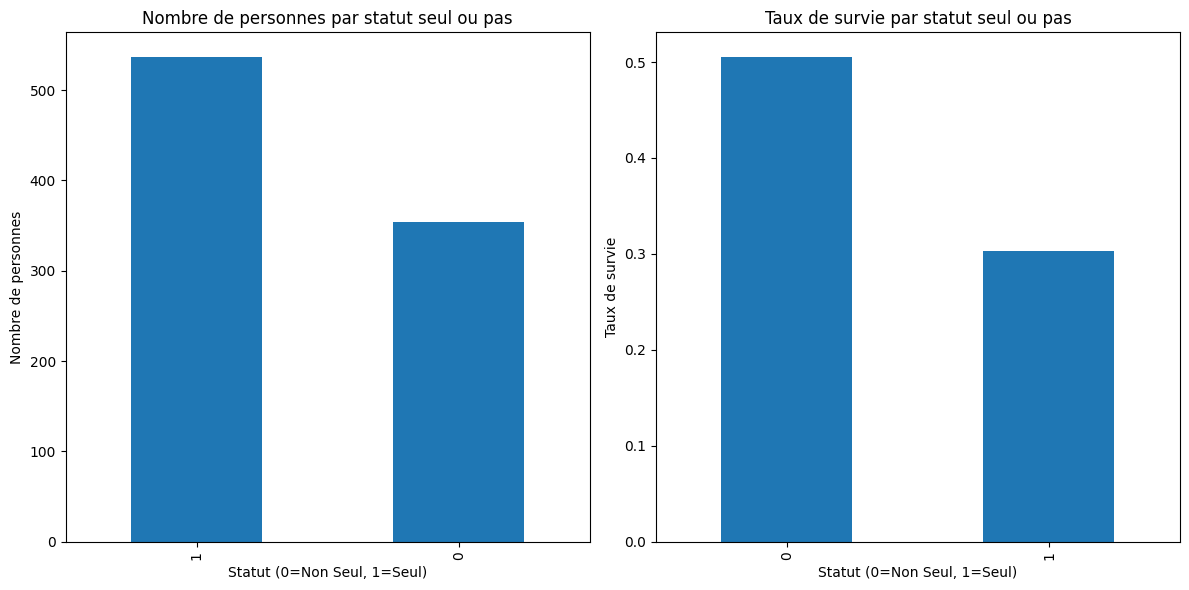

In [22]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
train['IsAlone'].value_counts().plot(kind='bar')
plt.title('Nombre de personnes par statut seul ou pas')
plt.xlabel('Statut (0=Non Seul, 1=Seul)')
plt.ylabel('Nombre de personnes')

plt.subplot(1, 2, 2)
train.groupby('IsAlone')['Survived'].mean().plot(kind='bar')
plt.title('Taux de survie par statut seul ou pas')
plt.xlabel('Statut (0=Non Seul, 1=Seul)')
plt.ylabel('Taux de survie')

plt.tight_layout()
plt.show()


2.7 Calculer l'information mutuelle sur les données train.

Attention : Il y a des données continues et des données discrètes

Ignorer les colonnes Name, Ticket et Cabin

In [46]:
numerical_cols = ['Age', 'SibSp', 'Parch', 'Fare', 'FamilySize']
categorical_cols = ['Survived', 'Pclass', 'Sex', 'Embarked', 'IsAlone']

def calculate_mutual_information(data, numerical_cols, categorical_cols):
    mi_scores = {}
    for col in numerical_cols:
        mi_scores[col] = mutual_info_regression(data[[col]], data['Survived'])[0]
    for col in categorical_cols:
      if col != 'Survived':
          mi_scores[col] = mutual_info_regression(pd.get_dummies(data[col]), data['Survived'])[0]
    return mi_scores

mi_scores = calculate_mutual_information(train, numerical_cols, categorical_cols)

for col, mi in mi_scores.items():
    print(f"Information mutuelle entre 'Survived' et '{col}': {mi}")


Information mutuelle entre 'Survived' et 'Age': 0.04335693809528429
Information mutuelle entre 'Survived' et 'SibSp': 0
Information mutuelle entre 'Survived' et 'Parch': 0.013151973901730951
Information mutuelle entre 'Survived' et 'Fare': 0.12858854208761183
Information mutuelle entre 'Survived' et 'FamilySize': 0.045551450290137296
Information mutuelle entre 'Survived' et 'Pclass': 0.08480111847166327
Information mutuelle entre 'Survived' et 'Sex': 0.1515331071236936
Information mutuelle entre 'Survived' et 'Embarked': 0.011834981964969682
Information mutuelle entre 'Survived' et 'IsAlone': 0.0


2.8 Afficher dans un graphique les scores d'information mutuelle par feature

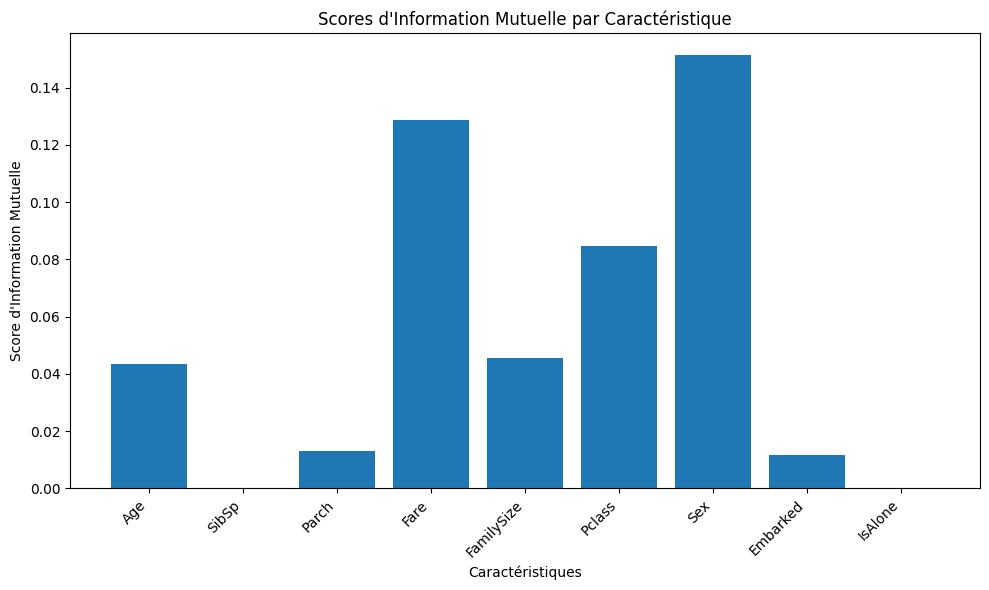

In [47]:
features = list(mi_scores.keys())
scores = list(mi_scores.values())

plt.figure(figsize=(10, 6))
plt.bar(features, scores)
plt.xlabel("Caractéristiques")
plt.ylabel("Score d'Information Mutuelle")
plt.title("Scores d'Information Mutuelle par Caractéristique")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Question 1 : La variable Classe est-elle utile pour prévoir la survie ? Pourquoi ?

- La variable Classe est utile pour prévoir la survie. On observe au sein des résultats que le taux de survie est beaucoup plus élevé pour les passagers en première classe (62.96 %) par rapport à ceux en deuxième classe (47.28 %) et enfin en troisième classe (24.24 %).
- Exemple d'interprétation de ces résultats - les passagers de première classe, qui bénéficient de meilleures conditions à bord et peuvent avoir un accès privilégié aux canots de sauvetage, avaient plus de chances de survivre.

<br>

Cette disparité suggère que la classe socio-économique a un impact direct sur la probabilité de survie, dû moins à l'époque.

<br>
<br>

### Question 2 : Même question pour la variable Sex
- La variable Sexe est également très pertinente pour prévoir la survie. L'analyse montre que les femmes ont un taux de survie beaucoup plus élevé que les hommes dans toutes les classes. Par exemple, en 1ère classe, 96.81 % des femmes ont survécu contre seulement 36.89 % des hommes.
- Exemple d'interprétation de ces résultats - dans ce genre de cas extrême, les hommes priorisent la sécurité des femmes (et des enfants).

<br>

Il est néanmoins important de souligner qu'en moyenne, moins de 30% des femmes survivent à la catastrophe contre près de 40% des hommes. Quant aux enfants, seuls 15% en réchappent ("Every man for himself  ! Gender, norms and survival in maritime disaster", 2012). Une étude de l'université d'Uppsala révèle qu'en moyenne, les hommes survivent mieux que les femmes dans les catastrophes maritimes. Les hommes réagiraient plus rapidement et seraient plus aptes à s'échapper. Lorsque les consignes d’évacuation sont floues, la logique "chacun pour soi" a tendance à l'emporter. Ainsi, bien que le Titanic ait vu une forte survie des femmes, cette règle n'est pas universelle. Le sexe reste une variable utile, mais son influence dépend du contexte.

<br>
<br>

### Question 3 : Comment traiter le variables liées à la famille du passager ?

Les variables SibSp (nombre de frères et sœurs/époux à bord) et Parch (nombre de parents/enfants à bord) peuvent être combinées pour créer une nouvelle variable : FamilySize. Cette variable mesure la taille de la famille d'un passager, ce qui peut affecter ses chances de survie. En effet, les passagers seuls peuvent avoir plus de difficultés à survivre, tandis que ceux en famille peuvent avoir plus de soutien. Une autre nouvelle variable, IsAlone, indique si un passager est seul (FamilySize = 1) ou non. Ces deux nouvelles variables peuvent être très utiles pour prédire la survie. Il serait également pertinent de créer des catégories pour la taille de la famille et d’examiner l'impact de chaque catégorie sur la survie.




## 3. Traitement des données manquantes (à faire sur les données Train et Test)

3.1 La variable "Embarked" possède des valeurs nulles, compléter par la valeur majoritaire (S).

In [30]:
train['Embarked'] = train['Embarked'].fillna('S')
test['Embarked'] = test['Embarked'].fillna('S')


3.2 Afficher l'influence du port d'embarquement sur la Survie

Embarked
C    55.36
Q    38.96
S    33.90
Name: Survived, dtype: float64


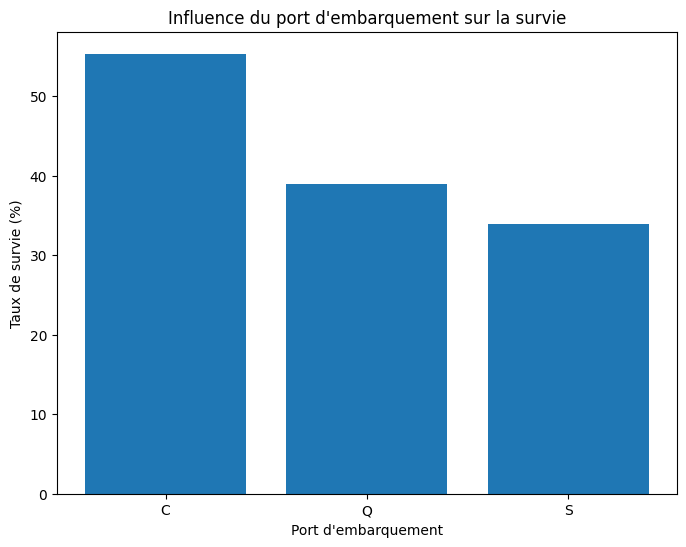

In [37]:
survival_per_embarked = train.groupby('Embarked')['Survived'].mean() * 100
survival_per_embarked = survival_per_embarked.round(2)

print(survival_per_embarked)

plt.figure(figsize=(8, 6))
plt.bar(survival_per_embarked.index, survival_per_embarked.values)
plt.xlabel("Port d'embarquement")
plt.ylabel("Taux de survie (%)")
plt.title("Influence du port d'embarquement sur la survie")
plt.show()


3.3 La variable "Fare" (prix du ticket) possède des valeurs manquantes. Remplacer ces valeurs par la valeur médiane.

In [32]:
median_fare = train['Fare'].median()

train['Fare'] = train['Fare'].fillna(median_fare)
test['Fare'] = test['Fare'].fillna(median_fare)


3.4 Créer une variable CategoricalFare Découpant la valeur de ticket en 4 catégories de tailles à peu près égales.

In [33]:
train['CategoricalFare'] = pd.qcut(train['Fare'], 4)
test['CategoricalFare'] = pd.qcut(test['Fare'], 4)


3.5 Analyser l'effet de ces catégories de prix de ticket sur la survie.

<ipython-input-38-7db935c98878>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_per_fare_category = train.groupby('CategoricalFare')['Survived'].mean() * 100


CategoricalFare
(-0.001, 7.91]     19.73
(7.91, 14.454]     30.36
(14.454, 31.0]     45.50
(31.0, 512.329]    58.11
Name: Survived, dtype: float64


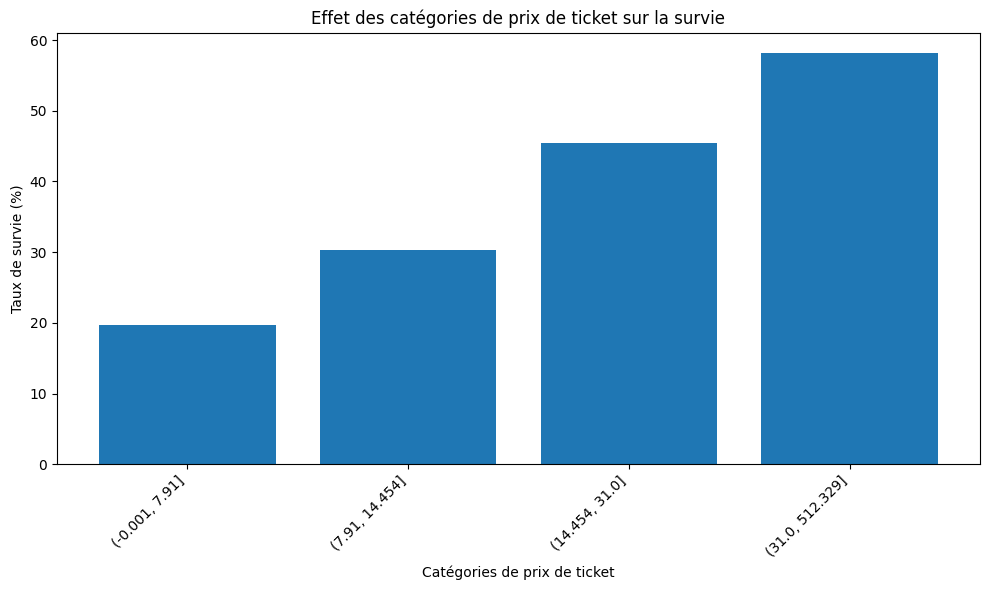

In [38]:
survival_per_fare_category = train.groupby('CategoricalFare')['Survived'].mean() * 100
survival_per_fare_category = survival_per_fare_category.round(2)

print(survival_per_fare_category)

plt.figure(figsize=(10, 6))
plt.bar(survival_per_fare_category.index.astype(str), survival_per_fare_category.values)
plt.xlabel("Catégories de prix de ticket")
plt.ylabel("Taux de survie (%)")
plt.title("Effet des catégories de prix de ticket sur la survie")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


3.6 Combien de valeurs d'Age manquent ? Complète par des valeurs entières aléatoires entre (moyenne - écart type) et (moyenne + écart type).

In [42]:
missing_age_count = train['Age'].isnull().sum()
print(f"Nombre de valeurs d'âge manquantes dans train : {missing_age_count}")

mean_age = train['Age'].mean()
std_age = train['Age'].std()

random_ages = np.random.randint(low=int(mean_age - std_age), high=int(mean_age + std_age), size=missing_age_count)

train['Age'][train['Age'].isnull()] = random_ages

missing_age_count_test = test['Age'].isnull().sum()
print(f"Nombre de valeurs d'âge manquantes dans test : {missing_age_count_test}")

mean_age_test = test['Age'].mean()
std_age_test = test['Age'].std()
random_ages_test = np.random.randint(low=int(mean_age_test - std_age_test), high=int(mean_age_test + std_age_test), size=missing_age_count_test)
test['Age'][test['Age'].isnull()] = random_ages_test


Nombre de valeurs d'âge manquantes dans train : 0
Nombre de valeurs d'âge manquantes dans test : 0


<ipython-input-42-447228e7d100>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Age'][train['Age'].isnull()] = random_ages
<ipython-input-42-447228e7d100>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Age'][test['Age'].isnull()] = random_ages_test


3.7 Créer une variable CategoricalAge Découpant la valeur d'age en 5 tranches d'age de même taille.

In [44]:
train['CategoricalAge'] = pd.qcut(train['Age'], 5)
test['CategoricalAge'] = pd.qcut(test['Age'], 5)

3.8 Analyser l'effet de ces catégories d'age sur la survie.

<ipython-input-45-11b6e54f7972>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_per_age_category = train.groupby('CategoricalAge')['Survived'].mean() * 100


CategoricalAge
(0.419, 19.0]    45.11
(19.0, 26.0]     33.85
(26.0, 32.0]     37.50
(32.0, 40.0]     41.67
(40.0, 80.0]     33.92
Name: Survived, dtype: float64


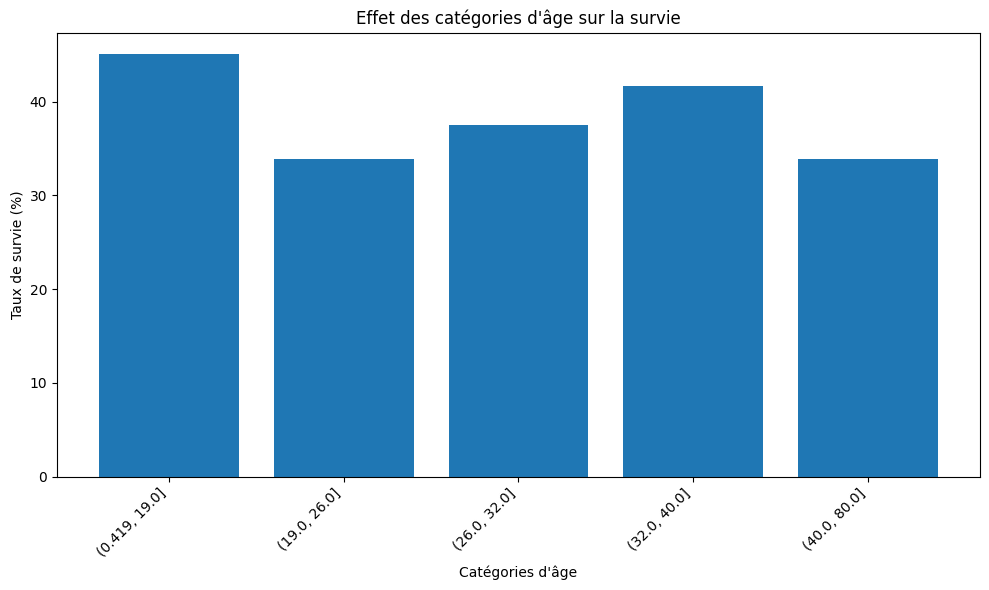

In [45]:
survival_per_age_category = train.groupby('CategoricalAge')['Survived'].mean() * 100
survival_per_age_category = survival_per_age_category.round(2)

print(survival_per_age_category)

plt.figure(figsize=(10, 6))
plt.bar(survival_per_age_category.index.astype(str), survival_per_age_category.values)
plt.xlabel("Catégories d'âge")
plt.ylabel("Taux de survie (%)")
plt.title("Effet des catégories d'âge sur la survie")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Question 1 : Classer les variables par ordre d'intérêt

## 4 : Traitement de features complexes

4.1 : Le nom permet de retrouver le titre du passager. Trouver les titres lorsqu'ils existent.

4.2 : En utilisant la fonction pandas crosstab, afficher pour train le nombre d'occurences par titres (en ligne) et par sexe (en colonne)

4.3 :
Remplacer 'Melle et 'Ms' par 'Miss'

Remplacer 'Mme' par 'Mrs'

Creer une valeur "Rare" pour les autres titres avec moins de 10 occurences.

Calculer ensuite le taux de survie par titre

## 5. Mise en forme des données non numériques

5.1 Attribuer une valeur numérique au Genre. Par exemple 0 pour 'female' et 1 pour 'male'

5.2 : Attribuer une valeur pour les possibilités de la variable "Title" ('Master','Miss','Mr','Mrs','Rare')

5.3 Remplacer les titres manquant par 0, et attribuer à la colonne le type entier

5.4 Attribuer une valeur numérique aux 4 catégories de la variable Fare

5.5 Attibuer une valeur numérique au Port d'embarquement (Embarked)

5.6 Supprimer les features inutiles

5.7 Afficher les infos pour les deux datasets

5.8 Sauver les deux datasets dans des fichier csv. Eviter d'écrire un index (n° de ligne)